# Treinamento do modelo

Bem vindo à seção de treinamento do nosso modelo!

Nesse arquivo, abordaremos desde à leitura de um dataset com a informação nutricional de cada ingrediente até ao treinamento de um modelo com um dataset apropriado


### Leitura e tratamento dos dados do dataset inicial

Nesse primeira trecho, realizaremos a leitura e tratamento dos dados de um dataset que contém as informações nutricionais de ingredientes comuns do nosso dia a dia no Brasil.

Escolhemos a Tabela Brasileira de Composição de Alimentos como base para realizar o desafio



In [554]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

## Lê csv com informações nutricionais de alimentos brasileiros
df = pd.read_csv("../data/raw/taco-db-nutrientes.csv")

df.head()


,id,Nome,Umidade (%),Energia (kcal),Energia (kJ),Proteína (g),Lipídeos (g),Colesterol (mg),Carboidrato (g),Fibra Alimentar (g),Cinzas (g),Cálcio (mg),Magnésio (mg),Unnamed: 13
0,1,Arroz integral cozido,70.1,124,517,2.6,1,NaN,25.8,2.7,0.5,5,59,NaN
1,2,Arroz integral cru,12.2,360,1505,7.3,1.9,NaN,77.5,4.8,1.2,8,110,NaN
2,3,Arroz tipo 1 cozido,69.1,128,537,2.5,0.2,NaN,28.1,1.6,0.1,4,2,NaN
3,4,Arroz tipo 1 cru,13.2,358,1497,7.2,0.3,NaN,78.8,1.6,0.5,4,30,NaN
4,5,Arroz tipo 2 cozido,68.7,130,544,2.6,0.4,NaN,28.2,1.1,0.1,3,6,NaN


Filtramos apenas pelas colunas que fazer sentido para o nosso desafio

In [555]:
# Filtra colunas importantes para o nosso projeto

df_colunas_importantes = df [[' Nome', ' Energia (kcal)', ' Proteína (g)', ' Lipídeos (g)', ' Carboidrato (g)']]

df_colunas_importantes.head(5)

,Nome,Energia (kcal),Proteína (g),Lipídeos (g),Carboidrato (g)
0,Arroz integral cozido,124,2.6,1,25.8
1,Arroz integral cru,360,7.3,1.9,77.5
2,Arroz tipo 1 cozido,128,2.5,0.2,28.1
3,Arroz tipo 1 cru,358,7.2,0.3,78.8
4,Arroz tipo 2 cozido,130,2.6,0.4,28.2


Nesse trecho, retiramos da nossa base de dados as linhas que possuem dados que são não inteiros (string ou Nan) das colunas numéricas.

Além disso, faz-se necessário não utilizarmos ingredientes que não podem ser utilizados em uma refeição comum (alimentos crus). É importante ressaltar, também, que retiramos alimentos duplicados na nossa base de base dados (tipo 1, tipo 2) para facilitar o input inicial do usuário quando este for utilizar o modelo (o fato de existir ingredientes como "arroz tipo 1" e "arroz tipo 2" no dataset iria dificultar a usabilidade do modelo)

Nesse sentido, isso nos resulta em uma base de dados pronta para que seja realizada a montagem de um próximo dataset que será utilizado no treinamento do modelo.

In [556]:
## Retira ingredientes que não fazem sentido para uma refeição comum
palavras_proibidas = 'cru|crua|tipo 1|tipo 2|mistura'

df_ingredientes_formatados = df_colunas_importantes[df_colunas_importantes[' Nome'].str.contains(palavras_proibidas, case=False)==False]

# Seleciona apenas as colunas numéricas

colunas_numericas = df_ingredientes_formatados.columns.drop(' Nome')  

# Transforma valores strings incorretos das colunas numéricas em Nan.
# Além disso, preenche campos vazios com Nan

df_ingredientes_formatados[colunas_numericas] = df_ingredientes_formatados[colunas_numericas].apply(pd.to_numeric, errors='coerce')


# Dropa colunas com valores Nan
df_semNan = df_ingredientes_formatados.dropna(subset=[' Proteína (g)', ' Lipídeos (g)', ' Carboidrato (g)'])

# Retira whitespaces das rows da coluna Nome
df_semNan[' Nome'] = df_semNan[' Nome'].str.strip()


df_semNan.head(10)


/tmp/ipykernel_70896/1736157405.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ingredientes_formatados[colunas_numericas] = df_ingredientes_formatados[colunas_numericas].apply(pd.to_numeric, errors='coerce')
/tmp/ipykernel_70896/1736157405.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_semNan[' Nome'] = df_semNan[' Nome'].str.strip()


,Nome,Energia (kcal),Proteína (g),Lipídeos (g),Carboidrato (g)
0,Arroz integral cozido,124.0,2.6,1.0,25.8
7,Biscoito doce maisena,443.0,8.1,12.0,75.2
8,Biscoito doce recheado com chocolate,472.0,6.4,19.6,70.5
9,Biscoito doce recheado com morango,471.0,5.7,19.6,71.0
10,Biscoito doce wafer recheado de chocolate,502.0,5.6,24.7,67.5
11,Biscoito doce wafer recheado de morango,513.0,4.5,26.4,67.4
12,Biscoito salgado cream cracker,432.0,10.1,14.4,68.7
14,Bolo pronto aipim,324.0,4.4,12.7,47.9
15,Bolo pronto chocolate,410.0,6.2,18.5,54.7
16,Bolo pronto coco,333.0,5.7,11.3,52.3


### Criação do dataset do modelo

Agora, realizaremos a criação do dataset que irá conter as informações necessárias para o treinamento do modelo de acordo com os requisitos do nosso projeto (ingredientes, calorias, carboidratos, proteínas e gorduras)

In [557]:
import itertools

import pandas as pd


# Pega 25 ingredientes aleatórios e realiza combinações entre eles (Gerando mais de 12 mil linhas de dados)
df_subconjunto = df_semNan.sample(n=25, random_state=7)

print(df_subconjunto[' Nome'])


combinacoes_resultado = []

# Para cada combinaçao de refeição possível (4 ingredientes)
for combinacao in itertools.combinations(df_subconjunto[' Nome'], 4):
    
    # Monta um novo df apenas com os dados dos ingredientes da combinação atual
    df_combinacao = df_subconjunto[df_subconjunto[' Nome'].isin(combinacao)]
    
    # Soma os nutrientes da refeição
    soma_calorias = df_combinacao[' Energia (kcal)'].sum()
    soma_proteina = df_combinacao[' Proteína (g)'].sum()
    soma_lipideos = df_combinacao[' Lipídeos (g)'].sum()
    soma_carboidrato = df_combinacao[' Carboidrato (g)'].sum()
    
    # Adiciona esses dados numa lista
    combinacoes_resultado.append({
        'ingredientes': set(combinacao),
        'Calorias': soma_calorias,
        'Proteinas': soma_proteina,
        'Gorduras': soma_lipideos,
        'Carboidratos': soma_carboidrato
    })

#Transforma a lista em um df
df_combinacoes = pd.DataFrame(combinacoes_resultado)


print(df_combinacoes.shape)
df_combinacoes.head(10)





223           Mamão doce em calda drenado
458             Leite de vaca integral pó
538               Feijão tropeiro mineiro
547                             Sarapatel
416            Hambúrguer bovino grelhado
424                 Peru congelado assado
292                 Corvina grande assada
187        Caju suco concentrado envasado
139                  Pão de queijo assado
498                         Cocada branca
99                        Brócolis cozido
283      Camarão Rio Grande grande cozido
355          Carne bovina fígado grelhado
536                  Estrogonofe de carne
108                        Cenoura cozida
434                   Porco pernil assado
400                Frango filé à milanesa
9      Biscoito doce recheado com morango
593                       Linhaça semente
579                Pé-de-moleque amendoim
541              Macarrão molho bolognesa
583                    Soja queijo (tofu)
476                  Chá preto infusão 5%
302                    Merluza fil

,ingredientes,Calorias,Proteinas,Gorduras,Carboidratos
0,"{Mamão doce em calda drenado, Leite de vaca in...",968.0,54.3,38.2,113.9
1,"{Hambúrguer bovino grelhado, Mamão doce em cal...",1055.0,49.0,46.2,124.1
2,"{Peru congelado assado, Mamão doce em calda dr...",1008.0,62.0,39.5,112.8
3,"{Mamão doce em calda drenado, Leite de vaca in...",992.0,62.6,37.4,112.8
4,"{Caju suco concentrado envasado, Mamão doce em...",890.0,36.2,34.0,123.5
5,"{Mamão doce em calda drenado, Leite de vaca in...",1208.0,40.9,58.4,147.0
6,"{Cocada branca, Mamão doce em calda drenado, L...",1294.0,36.9,47.4,194.2
7,"{Mamão doce em calda drenado, Leite de vaca in...",870.0,37.9,34.3,117.2
8,"{Mamão doce em calda drenado, Leite de vaca in...",935.0,54.8,34.8,112.8
9,"{Mamão doce em calda drenado, Leite de vaca in...",1070.0,65.7,42.8,117.0


Nesse sentido, como os dados dos nutrientes de cada ingrediente equivale a 100 gramas, a soma de 4 ingredientes resultará em 400 gramas, que será o peso que utilizaremos para considerar um refeição padrão de um adulto, conforme explicitado na dataset acima.

 ##### Consideraremos também, as seguintes premissas para que uma refeição seja considerada saudável:

Deve conter entre 400 e 600 calorias: https://www.nhs.uk/better-health/lose-weight/calorie-counting/

40% das calorias devem ser proteínas.

40% das calorias devem ser carboidratos.

20% das calorias devem ser gorduras.

Fonte: https://revistagalileu.globo.com/Life-Hacks/noticia/2015/05/calorias-que-nada-aprenda-calcular-os-macronutrientes-da-sua-dieta.html

Utilizaremos a média entre 400 e 600 (500) como base para o resultado da porcentagem.

##### Padronização dos dados do dataset

Para facilitar a utilização do nosso modelo, iremos padronizar os valores em formas de porcentagem, isso irá nos ajudar a conseguir uma maior acurária no modelo e reduzir custos computacionais, garantindo que todos os valores possuem a mesma magnitude.



In [558]:
def padronizaDf(df):
  porcentagemProteína = 4/10
  porcentagemCarboidrato = 4/10
  porcentagemGordura = 2/10

  caloriasTotais = 500

  caloriasIdeaisProteina = porcentagemProteína * caloriasTotais
  caloriasIdeaisCarboidrato = porcentagemCarboidrato * caloriasTotais
  caloriasIdeaisGordura = porcentagemGordura * caloriasTotais

  caloriasGramaDeProteína = 4
  caloriasGramaDeGordura = 9
  caloriasGramaDeCarboidrato= 4

  df['Calorias'] = df['Calorias']/caloriasTotais * 100

  df['Proteinas'] = df['Proteinas'] * caloriasGramaDeProteína / caloriasIdeaisProteina * 100
  df['Gorduras'] = df['Gorduras'] * caloriasGramaDeGordura / caloriasIdeaisGordura * 100
  df['Carboidratos'] = df['Carboidratos'] * caloriasGramaDeCarboidrato / caloriasIdeaisCarboidrato * 100

  return df



df_padronizado = padronizaDf(df_combinacoes)

df_padronizado.head(10)

,ingredientes,Calorias,Proteinas,Gorduras,Carboidratos
0,"{Mamão doce em calda drenado, Leite de vaca in...",193.6,108.6,343.8,227.8
1,"{Hambúrguer bovino grelhado, Mamão doce em cal...",211.0,98.0,415.8,248.2
2,"{Peru congelado assado, Mamão doce em calda dr...",201.6,124.0,355.5,225.6
3,"{Mamão doce em calda drenado, Leite de vaca in...",198.4,125.2,336.6,225.6
4,"{Caju suco concentrado envasado, Mamão doce em...",178.0,72.4,306.0,247.0
5,"{Mamão doce em calda drenado, Leite de vaca in...",241.6,81.8,525.6,294.0
6,"{Cocada branca, Mamão doce em calda drenado, L...",258.8,73.8,426.6,388.4
7,"{Mamão doce em calda drenado, Leite de vaca in...",174.0,75.8,308.7,234.4
8,"{Mamão doce em calda drenado, Leite de vaca in...",187.0,109.6,313.2,225.6
9,"{Mamão doce em calda drenado, Leite de vaca in...",214.0,131.4,385.2,234.0


##### Criação da nova coluna classificação (0 = não saudável, 1 = saudável)

Nesse momento, realizaremos a criação de uma nova coluna que indicará se a a determinada refeição  é saudável ou não.

Como os dados numéricos estão padronizados, isso nos facilita para adotarmos um critério geral.

Será considerada uma refeição saudável aquela que possuir todos os atributos numéricos entre 50% e 150%, o que garante um equilibrírio na ingestão de cada nutriente e de calorias


In [559]:
condições = [
    (df_padronizado['Calorias'] < 150) & (df_padronizado['Calorias'] > 50) &
    (df_padronizado['Proteinas'] < 150) & (df_padronizado['Proteinas'] > 50) &
    (df_padronizado['Gorduras'] < 150) & (df_padronizado['Gorduras'] > 50) &
    (df_padronizado['Carboidratos'] < 150) & (df_padronizado['Carboidratos'] > 50)
]

categorias = [1]

df_padronizado['Classificação'] = np.select(condições, categorias, default=0)

porcentagens = df_padronizado['Classificação'].value_counts(normalize=True) * 100

## Verifica porcentagem de refeições consideradas saudáveis e não saudáveis
print(porcentagens)

print(df_padronizado.shape)


df_padronizado.head(10)

Classificação
0    95.130435
1     4.869565
Name: proportion, dtype: float64
(12650, 6)


,ingredientes,Calorias,Proteinas,Gorduras,Carboidratos,Classificação
0,"{Mamão doce em calda drenado, Leite de vaca in...",193.6,108.6,343.8,227.8,0
1,"{Hambúrguer bovino grelhado, Mamão doce em cal...",211.0,98.0,415.8,248.2,0
2,"{Peru congelado assado, Mamão doce em calda dr...",201.6,124.0,355.5,225.6,0
3,"{Mamão doce em calda drenado, Leite de vaca in...",198.4,125.2,336.6,225.6,0
4,"{Caju suco concentrado envasado, Mamão doce em...",178.0,72.4,306.0,247.0,0
5,"{Mamão doce em calda drenado, Leite de vaca in...",241.6,81.8,525.6,294.0,0
6,"{Cocada branca, Mamão doce em calda drenado, L...",258.8,73.8,426.6,388.4,0
7,"{Mamão doce em calda drenado, Leite de vaca in...",174.0,75.8,308.7,234.4,0
8,"{Mamão doce em calda drenado, Leite de vaca in...",187.0,109.6,313.2,225.6,0
9,"{Mamão doce em calda drenado, Leite de vaca in...",214.0,131.4,385.2,234.0,0


##### Binarização dos ingredientes (one-hot-enconding)

Além disso, transformaremos cada ingrediente em uma coluna com valor binário. Caso o ingrediente esteja associado àquela refeição, será associado um valor 1 a ele.

In [560]:
# Binarização dos ingredientes

mlb = MultiLabelBinarizer()
ingredientes_bin = pd.DataFrame(mlb.fit_transform(df_padronizado['ingredientes']),
                                 columns=mlb.classes_,
                                 index=df_padronizado.index)

# Cria um df com os valores nutricionais
df_features = pd.concat([ingredientes_bin, 
                         df_padronizado[['Calorias', 'Proteinas', 'Gorduras', 'Carboidratos']]], axis=1)


y = df_padronizado['Classificação']

df_features.head(10)

,Biscoito doce recheado com morango,Brócolis cozido,Caju suco concentrado envasado,Camarão Rio Grande grande cozido,Carne bovina fígado grelhado,Cenoura cozida,Chá preto infusão 5%,Cocada branca,Corvina grande assada,Estrogonofe de carne,Feijão tropeiro mineiro,Frango filé à milanesa,Hambúrguer bovino grelhado,Leite de vaca integral pó,Linhaça semente,Macarrão molho bolognesa,Mamão doce em calda drenado,Merluza filé frito,Milho verde enlatado drenado,Peru congelado assado,Porco pernil assado,Pão de queijo assado,Pé-de-moleque amendoim,Sarapatel,Soja queijo (tofu),Calorias,Proteinas,Gorduras,Carboidratos
0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,193.6,108.6,343.8,227.8
1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,211.0,98.0,415.8,248.2
2,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,201.6,124.0,355.5,225.6
3,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,198.4,125.2,336.6,225.6
4,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,178.0,72.4,306.0,247.0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,241.6,81.8,525.6,294.0
6,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,258.8,73.8,426.6,388.4
7,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,174.0,75.8,308.7,234.4
8,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,187.0,109.6,313.2,225.6
9,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,214.0,131.4,385.2,234.0


### Treinamento do modelo e análise de métricas

Agora, realizaremos o treinamento do nosso modelo.
Dividiremos nosso dados em 20% para dados de teste e 80% para dados de treino.

Percebemos, também, que as métricas do nosso modelo estão muito boas, todas acima de 99%.

Além disso, no nosso teste, com mais de 2418 refeições, ocorreu apenas 1 falso positivo.

Acurácia do modelo: 0.999604743083004
Relatório:  
               precision    recall  f1-score   support

           0   1.000000  0.999587  0.999793      2419
           1   0.991071  1.000000  0.995516       111

    accuracy                       0.999605      2530
   macro avg   0.995536  0.999793  0.997654      2530
weighted avg   0.999608  0.999605  0.999606      2530



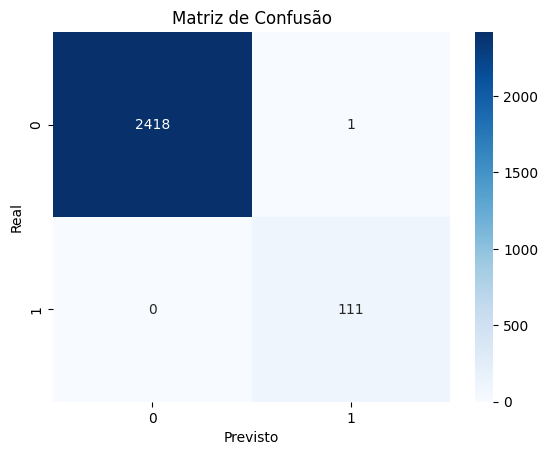

In [561]:
X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.2, random_state=42)

modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

print("Acurácia do modelo:", accuracy_score(y_test, y_pred))
print("Relatório:  \n", classification_report(y_test, y_pred,digits=6))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=modelo.classes_, yticklabels=modelo.classes_)
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()
